Author: James Martindale

## Functions

In [1]:
import gym
from statistics import mean
import numpy
import pandas
import matplotlib.pyplot as plt
from tqdm import tqdm

def sarsa_experiment(steps_per_episode:int=200, training_episodes:int=5000,
                position_levels:int=20, velocity_levels:int=20,
                learning_rate:float=0.1, exploration_chance:float=0.05,
                discount_factor:float=0.9, render:bool=False):
    """Returns list of episode scores, first successful episode, best score, percentage successful episodes."""
    # Override episode length
    custom_env = 'MountainCar-CustomLength-v0'
    gym.envs.registry.env_specs.pop(custom_env, None) # For persistent kernels
    gym.envs.register(
        id=custom_env,
        entry_point='gym.envs.classic_control:MountainCarEnv',
        max_episode_steps=steps_per_episode,
        reward_threshold=-110.0,
    )

    actions = [0, 1, 2]
    # Q[tile, action]
    Q = [[0 for _ in actions] for _ in range(position_levels*velocity_levels)] # Optimistic for now

    env = gym.make('MountainCar-CustomLength-v0')

    position_bins = numpy.linspace(env.observation_space.low[0], env.observation_space.high[0], position_levels)
    velocity_bins = numpy.linspace(env.observation_space.low[1], env.observation_space.high[1], velocity_levels)
    def tile(observation: numpy.ndarray) -> numpy.int64:
        """Convert a continuous position and velocity to a discrete tile."""
        return numpy.digitize(observation[0], position_bins) * velocity_levels + numpy.digitize(observation[1], velocity_bins)

    rand = numpy.random.default_rng()
    def policy(state: int) -> numpy.int64:
        """Given a state, return the action to take based on Q."""
        # Exploration
        if rand.random() < exploration_chance:
            return rand.choice(actions)
        # or nah
        return numpy.argmax(Q[state])

    # Loop for each episode:
    episode_scores = []
    first_success = None
    for episode in tqdm(range(training_episodes), unit=' trials'):
        # Initialize S
        observation = env.reset()
        state = tile(observation)

        # Choose A from S using policy derived from Q
        action = policy(state)

        # Loop for each step of episode:
        t = 0
        total_reward = 0
        done = False
        while not done:
            # Take action A, observe R, S'
            t += 1
            observation, reward, done, info = env.step(action)
            if render:
                env.render()
            next_state = tile(observation)
            total_reward += reward

            # Choose A' from S' using policy derived from Q
            next_action = policy(next_state)

            # Update Q
            Q[state][action] += learning_rate * (reward + discount_factor*Q[next_state][next_action] - Q[state][action])

            # Update S, A
            state = next_state
            action = next_action
        
        if not first_success and total_reward > -200:
            first_success = episode
        episode_scores.append(total_reward)
    
    # Return trial info
    return (episode_scores, first_success, max(episode_scores), len([score for score in episode_scores if score > -200])/training_episodes)

## Trial Runner

In [8]:
def sarsa_trial(steps_per_episode=200, training_episodes=6000, **kwargs):
    episode_scores, first_success, best_score, success_percentage = sarsa_experiment(steps_per_episode, training_episodes, **kwargs)
    print('First success: Episode %d' % first_success if first_success else 'No successes')
    print('Best score: %d' % best_score)
    print('Success Percentage: %.2f' % success_percentage)
    binned = []
    for i in range(0, training_episodes, 100):
        binned.append(mean(episode_scores[i:i+100]))
    fig, ax = plt.subplots()
    if steps_per_episode > 200:
        ax.set_ylim(-500, -100)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Moving Average Reward of Past 100 Episodes')
    ax.set_title('SARSA, %d Steps/Episode' % steps_per_episode)
    ax.plot(range(training_episodes), pandas.Series(episode_scores).rolling(100).mean(), label='Rolling Mean')
    return episode_scores # For further graph experimentation

#episode_scores = sarsa_trial(steps_per_episode=1000, training_episodes=5000)

## 200-Step Trials

  0%|          | 6/5000 [00:00<01:31, 54.47 trials/s]

First success: Episode 377
Best score: -110
Success Percentage: 0.55


  0%|          | 6/5000 [00:00<01:24, 59.02 trials/s]

First success: Episode 385
Best score: -96
Success Percentage: 0.56


  0%|          | 6/5000 [00:00<01:23, 59.64 trials/s]

First success: Episode 424
Best score: -111
Success Percentage: 0.54


  0%|          | 6/5000 [00:00<01:35, 52.35 trials/s]

First success: Episode 364
Best score: -110
Success Percentage: 0.54


  0%|          | 6/5000 [00:00<01:37, 51.48 trials/s]

First success: Episode 399
Best score: -92
Success Percentage: 0.55


  0%|          | 6/5000 [00:00<01:27, 57.08 trials/s]

First success: Episode 417
Best score: -111
Success Percentage: 0.56


  0%|          | 6/5000 [00:00<01:30, 55.34 trials/s]

First success: Episode 294
Best score: -111
Success Percentage: 0.56


  0%|          | 5/5000 [00:00<01:57, 42.55 trials/s]

First success: Episode 413
Best score: -106
Success Percentage: 0.55


  0%|          | 4/5000 [00:00<02:17, 36.39 trials/s]

First success: Episode 347
Best score: -88
Success Percentage: 0.57


100%|██████████| 5000/5000 [01:26<00:00, 58.08 trials/s]


First success: Episode 273
Best score: -109
Success Percentage: 0.56


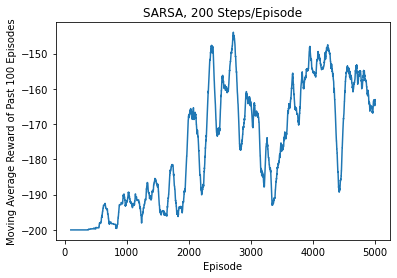

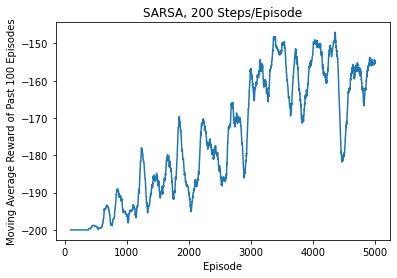

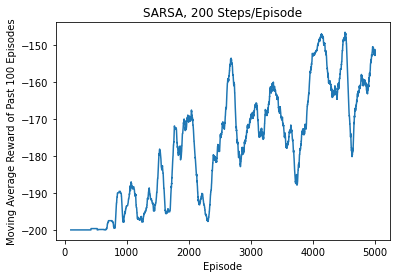

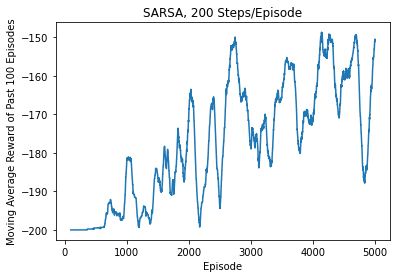

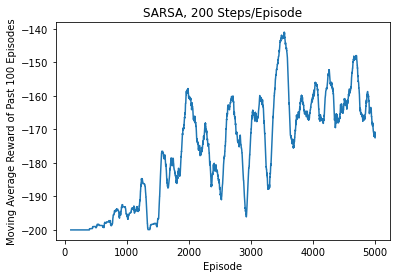

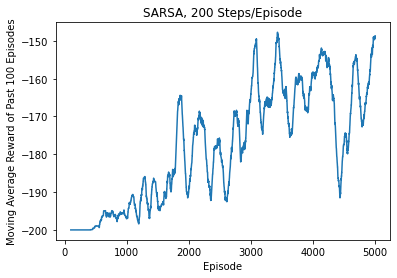

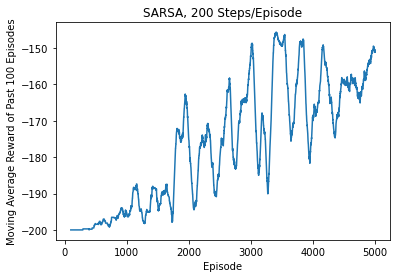

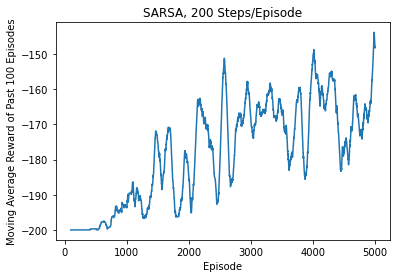

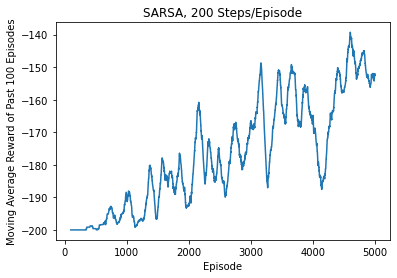

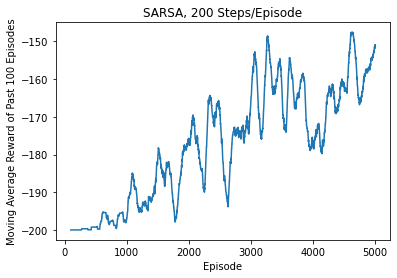

In [10]:
for _ in range(10):
    sarsa_trial(steps_per_episode=200, training_episodes=5000)

## 500-Step Trials

  0%|          | 3/5000 [00:00<03:44, 22.26 trials/s]

First success: Episode 227
Best score: -110
Success Percentage: 0.63


  0%|          | 3/5000 [00:00<03:52, 21.52 trials/s]

First success: Episode 328
Best score: -89
Success Percentage: 0.65


  0%|          | 3/5000 [00:00<03:48, 21.89 trials/s]

First success: Episode 287
Best score: -109
Success Percentage: 0.59


  0%|          | 2/5000 [00:00<04:21, 19.12 trials/s]

First success: Episode 145
Best score: -111
Success Percentage: 0.64


  0%|          | 2/5000 [00:00<05:57, 13.98 trials/s]

First success: Episode 149
Best score: -108
Success Percentage: 0.60


  0%|          | 3/5000 [00:00<03:38, 22.83 trials/s]

First success: Episode 188
Best score: -92
Success Percentage: 0.66


  0%|          | 3/5000 [00:00<03:47, 21.94 trials/s]

First success: Episode 174
Best score: -108
Success Percentage: 0.65


  0%|          | 3/5000 [00:00<03:46, 22.09 trials/s]

First success: Episode 268
Best score: -89
Success Percentage: 0.64


  0%|          | 3/5000 [00:00<03:45, 22.19 trials/s]

First success: Episode 291
Best score: -89
Success Percentage: 0.63


100%|██████████| 5000/5000 [01:37<00:00, 51.20 trials/s]


First success: Episode 188
Best score: -92
Success Percentage: 0.64


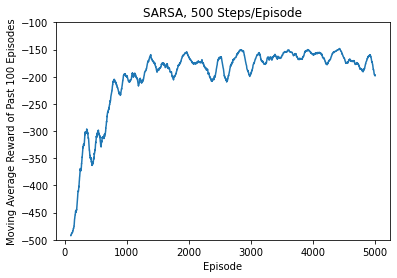

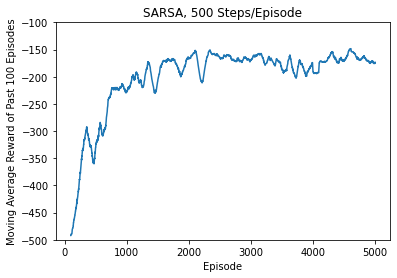

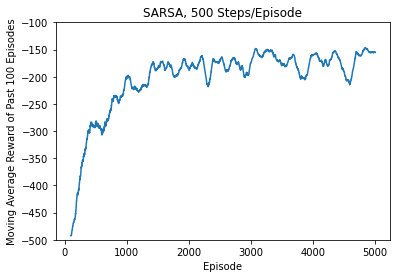

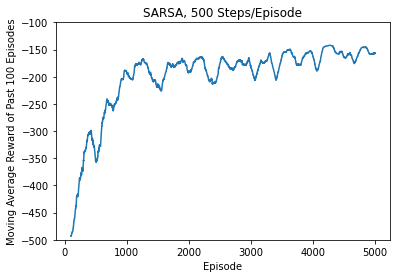

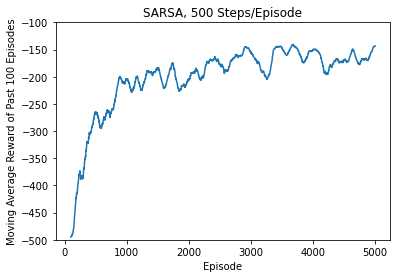

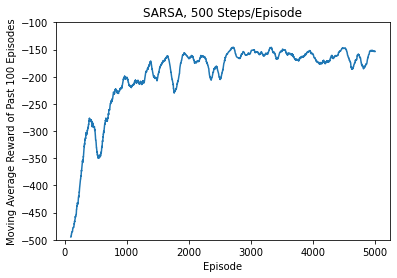

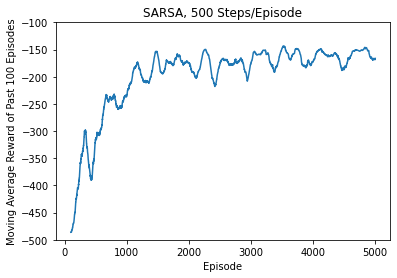

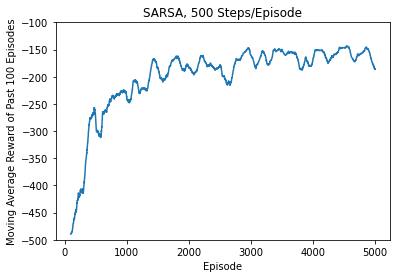

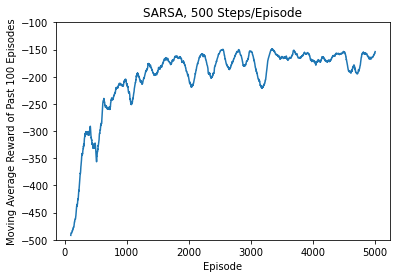

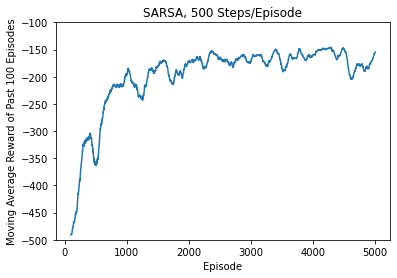

In [11]:
for _ in range(10):
    sarsa_trial(steps_per_episode=500, training_episodes=5000)

## 1000-Step Trials

  0%|          | 1/5000 [00:00<09:06,  9.15 trials/s]

First success: Episode 221
Best score: -110
Success Percentage: 0.62


  0%|          | 2/5000 [00:00<07:36, 10.95 trials/s]

First success: Episode 162
Best score: -88
Success Percentage: 0.65


  0%|          | 1/5000 [00:00<11:04,  7.53 trials/s]

First success: Episode 241
Best score: -93
Success Percentage: 0.68


  0%|          | 0/5000 [00:00<?, ? trials/s]

First success: Episode 287
Best score: -94
Success Percentage: 0.67


  0%|          | 2/5000 [00:00<07:08, 11.67 trials/s]

First success: Episode 201
Best score: -106
Success Percentage: 0.66


  0%|          | 1/5000 [00:00<10:55,  7.62 trials/s]

First success: Episode 115
Best score: -86
Success Percentage: 0.63


  0%|          | 0/5000 [00:00<?, ? trials/s]

First success: Episode 156
Best score: -93
Success Percentage: 0.66


  0%|          | 1/5000 [00:00<11:20,  7.34 trials/s]

First success: Episode 216
Best score: -92
Success Percentage: 0.66


  0%|          | 1/5000 [00:00<08:59,  9.27 trials/s]

First success: Episode 183
Best score: -101
Success Percentage: 0.66


100%|██████████| 5000/5000 [01:38<00:00, 50.53 trials/s]


First success: Episode 220
Best score: -110
Success Percentage: 0.68


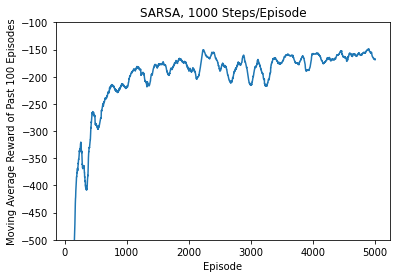

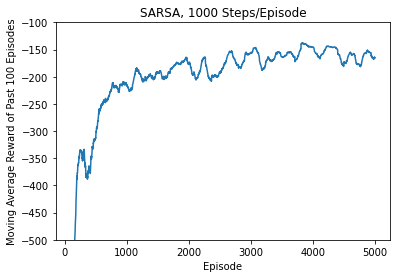

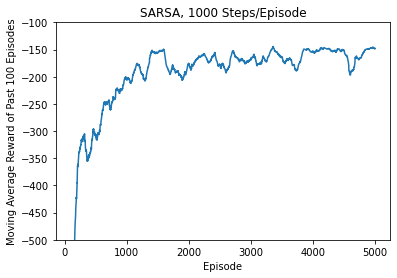

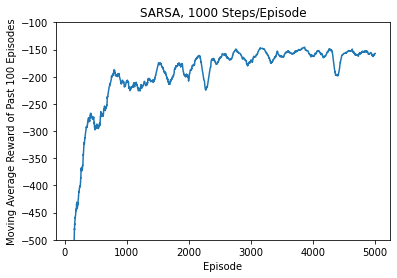

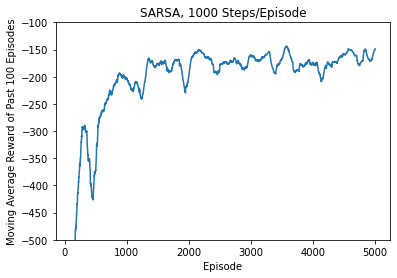

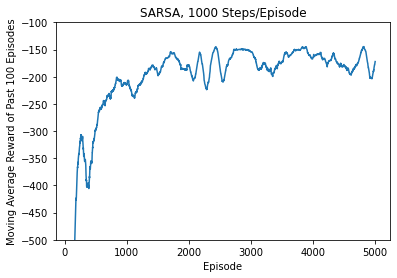

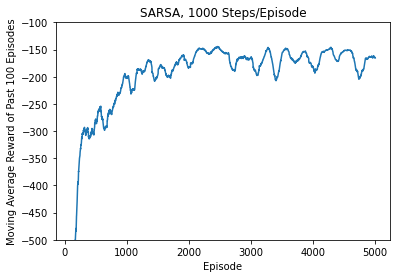

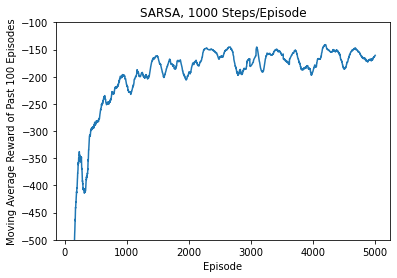

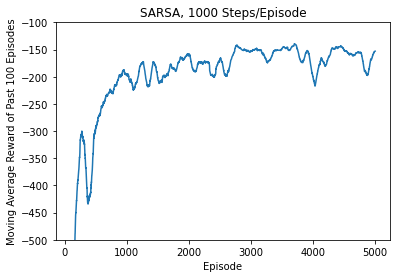

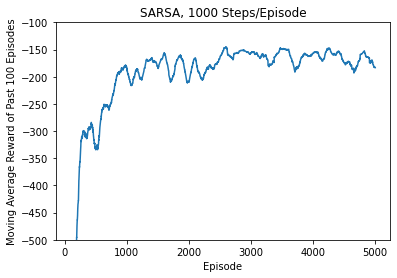

In [12]:
for _ in range(10):
    sarsa_trial(steps_per_episode=1000, training_episodes=5000)